In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def polynomial_fit(x, y, degree):
    # Vandermonde matrix
    X = np.vander(x, degree + 1)
    #least squares solution for the coefficients 'a'
    X_T_X = X.T @ X
    X_T_y = X.T @ y
    coeff = np.linalg.solve(X_T_X, X_T_y)  # Solve for coefficients
    return coeff

def evaluate_poly_horner(x, coeffs):
    result = 0
    for coeff in coeffs:
        result = result * x + coeff
    return result

In [16]:
input_path = 'C://Users//akpat//Desktop//Agnikul//Agniban01//CG MI Model V3.2//train data//'
df = pd.read_csv(input_path+'US_ATF.csv')
print('shape: ',df.shape)
df.head()

shape:  (10, 10)


,Mass (kg),r_cg_x (mm),r_cg_y (mm),r_cg_z (mm),Ixx (kg mm2),Iyx (kg mm2),Iyy (kg mm2),Izx (kg mm2),Izy (kg mm2),Izz (kg mm2)
0,10.591,-2553.322,0,0,3.216264e+05,4.539,6.921674e+07,2.374,0,6.921674e+07
1,37.880,-2495.095,0,0,2.067775e+06,13.615,2.369314e+08,7.121,0,2.369314e+08
2,78.344,-2438.082,0,0,5.838228e+06,23.181,4.689539e+08,12.125,0,4.689539e+08
3,128.460,-2382.602,0,0,1.159575e+07,30.522,7.360275e+08,15.964,0,7.360275e+08
4,184.705,-2329.037,0,0,1.883642e+07,34.104,1.013572e+09,17.838,0,1.013572e+09


In [22]:
x_train = df['Mass (kg)']
y_train = df['r_cg_x (mm)']
degree = 10
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs

array([ 7.28182466e-23, -1.13837974e-19,  4.98156922e-17,  1.51298825e-14,
       -2.41101600e-11,  1.09592000e-08, -2.71596092e-06,  4.09833576e-04,
       -3.95702928e-02,  3.42820597e+00, -2.58564569e+03])

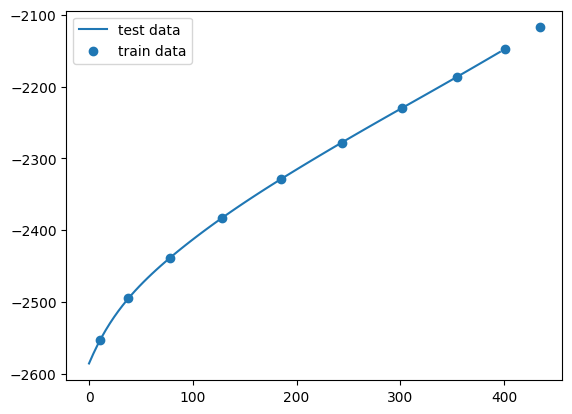

In [25]:
test_point = np.linspace(0,400,100)
y = []
# print(degrees[9])
# coeffs = coeffs_list[9]
for i in range(len(test_point)):
    y.append(evaluate_poly_horner(test_point[i], coeffs))

plt.plot(test_point[:-1], y[:-1], label = 'test data')
plt.scatter(df['Mass (kg)'][:20], df['r_cg_x (mm)'][:20], label = 'train data')
plt.legend()

## Finding best degree

In [114]:
x_train = df['Mass (kg)']
y_train = df['r_cg_x (mm)']
coeffs_list = []
degrees = np.arange(2, 18, 1)
for degree in degrees:
    coeffs = polynomial_fit(x_train, y_train, degree)
    coeffs_list.append(coeffs)
len(coeffs_list)

16

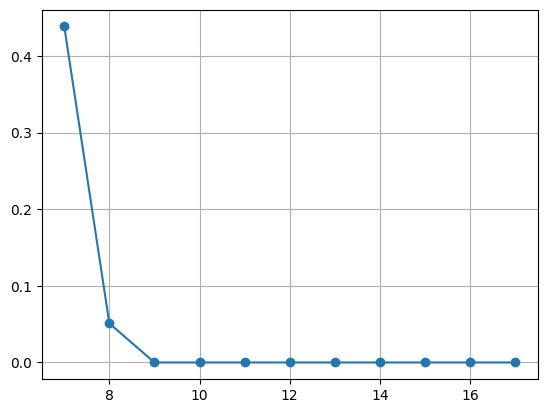

In [116]:
x_val = np.array(df['Mass (kg)'])
y_val = np.array(df['r_cg_x (mm)'])
df_test = pd.DataFrame()
df_test['mass'] = x_val
error = []
for i in range(len(coeffs_list)):
    coeff = coeffs_list[i]
    y_est = evaluate_poly_horner(x_val, coeff)
    error.append(np.sum((y_val-y_est)**2))
    df_test[f'deg_{degrees[i]}'] = y_est

plt.plot(degrees[5:], error[5:], marker='o')
plt.grid()